List of exercises 04

Author: Lucas Tavares @lucaase

In [1]:
# Modules...
import numpy as np              # numeric
import matplotlib.pyplot as plt # plotting
import pywt                     # wavelets

# inline plots
%matplotlib inline 

# Pearson correlation function
from scipy.stats.stats import pearsonr

# loading matlab data
from scipy.io import loadmat

# Pi
from math import pi

# Hilbert transform and filter functions
from scipy.signal import butter,filtfilt,hilbert,morlet,cwt,spectrogram

Loading the data

In [2]:
# Reads the ".mat" file
LFP = loadmat('LFP_HG_HFO.mat')

# Stores the signals into two variables
LFP_HFO = LFP['lfpHFO'][0]
LFP_HG = LFP['lfpHG'][0]
print(np.shape(LFP_HFO))
print(np.shape(LFP_HG))

srate = 1000;
dt = 1/srate;
t = np.arange(0.,len(LFP_HG)/srate,dt)

(300000,)
(300000,)


Question 1

In [4]:
# Filtering the signal
order = 2 # filter order
nyq = 0.5*srate # Nyquist frequency
theta_low_freq = 5. # low-pass frequency
theta_lowcut = theta_low_freq/nyq # cutoff point for filter
theta_high_freq = 10. # high-pass frequency
theta_highcut = theta_high_freq/nyq # cutoff point for filter
gamma_low_freq = 65.
gamma_lowcut = gamma_low_freq/nyq
gamma_high_freq = 100. 
gamma_highcut = gamma_high_freq/nyq

# butterworth transfer function
b,a = butter(order,[theta_lowcut,theta_highcut],'bandpass')
b2,a2 = butter(order,[gamma_lowcut,gamma_highcut],'bandpass')

# filtered signal
LFPthetaHFO = filtfilt(b,a,LFP_HFO)
LFPthetaHG = filtfilt(b,a,LFP_HG)

LFPgammaHFO = filtfilt(b2,a2,LFP_HFO)
LFPgammaHG = filtfilt(b2,a2,LFP_HG)

Question 2

In [5]:
AmpThetaHFO = abs(hilbert(LFPthetaHFO));
AmpThetaHG = abs(hilbert(LFPthetaHG));
AmpGammaHFO = abs(hilbert(LFPgammaHFO));
AmpGammaHG = abs(hilbert(LFPgammaHG));

Question 3

(1.0, 2.0)

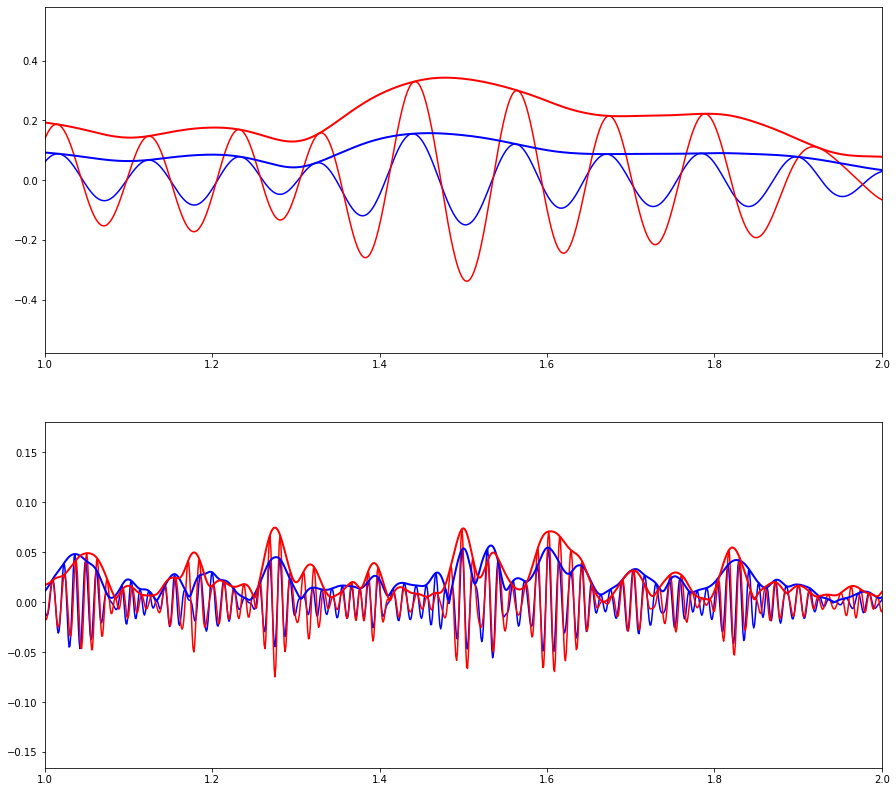

In [6]:
plt.figure(figsize=(15,14))
plt.subplot(211)
plt.plot(t,LFPthetaHFO,'b')
plt.plot(t,LFPthetaHG,'r')
plt.plot(t,AmpThetaHFO,'b',linewidth=2)
plt.plot(t,AmpThetaHG,'r',linewidth=2)
plt.xlim(1,2)

plt.subplot(212)
plt.plot(t,LFPgammaHFO,'b')
plt.plot(t,LFPgammaHG,'r')
plt.plot(t,AmpGammaHFO,'b',linewidth=2)
plt.plot(t,AmpGammaHG,'r',linewidth=2)
plt.xlim(1,2)

Question 4

Text(0.5, 1.0, 'r = 0.5761006229973853')

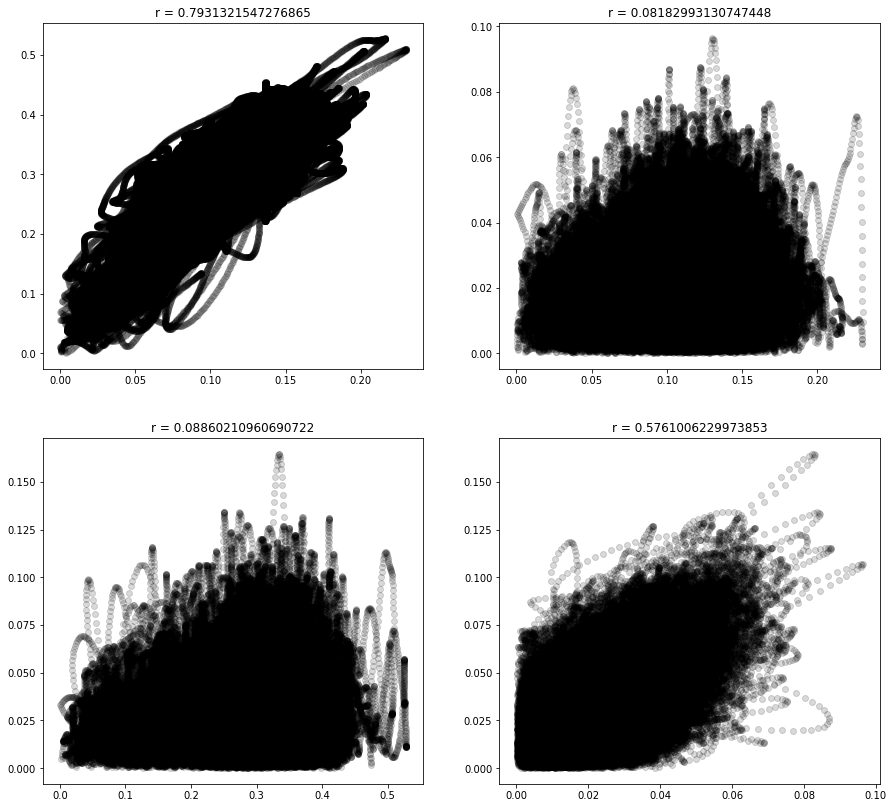

In [7]:
plt.figure(figsize=(15,14))

plt.subplot(221)
plt.plot(AmpThetaHFO, AmpThetaHG,'ko',alpha=0.15)
r, p = pearsonr(AmpThetaHFO,AmpThetaHG)
plt.title('r = '+str(r))


plt.subplot(222)
plt.plot(AmpThetaHFO, AmpGammaHFO,'ko',alpha=0.15)
r, p = pearsonr(AmpThetaHFO,AmpGammaHFO)
plt.title('r = '+str(r))

plt.subplot(223)
plt.plot(AmpThetaHG, AmpGammaHG,'ko',alpha=0.15)
r, p = pearsonr(AmpThetaHG,AmpGammaHG)
plt.title('r = '+str(r))

plt.subplot(224)
plt.plot(AmpGammaHFO, AmpGammaHG,'ko',alpha=0.15)
r, p = pearsonr(AmpGammaHFO,AmpGammaHG)
plt.title('r = '+str(r))

Question 5

(-2.0, 1.0)

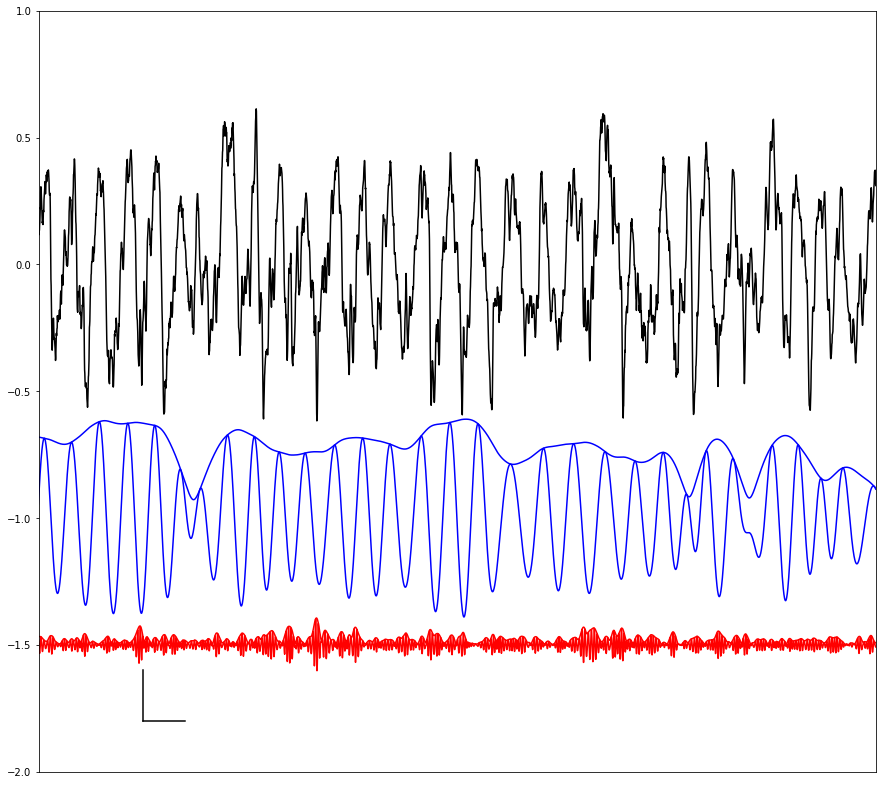

In [8]:
plt.figure(figsize=(15,14))

plt.plot(t,LFP_HG,'k-')
plt.plot(t,LFPthetaHG-1,'b-')
plt.plot(t,AmpThetaHG-1,'b-','linew',2)
plt.plot(t,LFPgammaHG-1.5,'r-')
plt.plot(t,AmpGammaHG-1.5,'r-','linew',2)

plt.plot([40.5,40.7],[-1.8,-1.8],'k-','linew',2)
plt.plot([40.5,40.5],[-1.8,-1.6],'k-','linew',2)

plt.xlim(40,44)
plt.ylim(-2,1)

Question 6

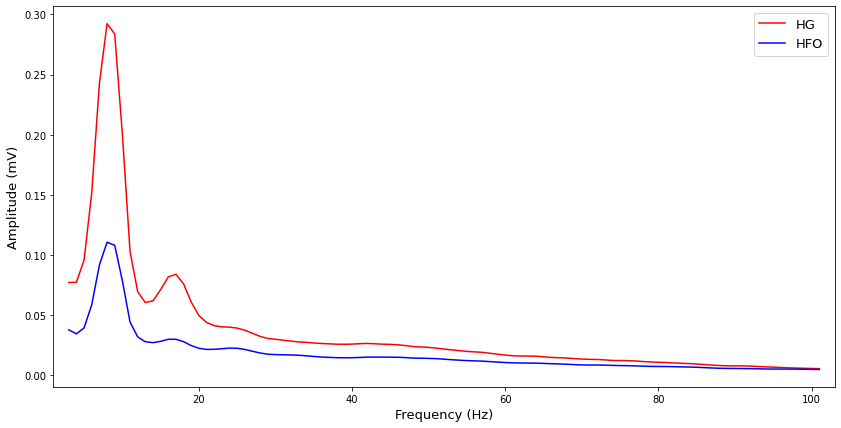

In [10]:
freqvector = np.arange(1.,100.,1)
bandwidth = 4. # in Hz
order = 2 # filter order
nyq = 0.5*srate # Nyquist frequency

AMPspectrumHG = np.empty(len(freqvector))
AMPspectrumHFO = np.empty(len(freqvector))

for i,f in enumerate(freqvector):
    # Filtering the signal
    lowcut = f/nyq
    highcut = (f+bandwidth)/nyq
    b,a = butter(order,[lowcut,highcut],'bandpass')
    LFPfiltHG = filtfilt(b,a,LFP_HG)
    LFPfiltHFO = filtfilt(b,a,LFP_HFO)
    
    AMPspectrumHG[i] = np.mean(abs(hilbert(LFPfiltHG)))
    AMPspectrumHFO[i] = np.mean(abs(hilbert(LFPfiltHFO)))

plt.figure(figsize=(14,7))

plt.plot(freqvector+bandwidth/2.,AMPspectrumHG,'r',label='HG')
plt.plot(freqvector+bandwidth/2.,AMPspectrumHFO,'b',label='HFO')
plt.xlabel('Frequency (Hz)',size=13)
plt.ylabel('Amplitude (mV)',size=13)
plt.legend(fontsize=13)
plt.xlim(freqvector[0],freqvector[-1]+bandwidth);

Question 7

Text(0.5, 1.0, 'HFO')

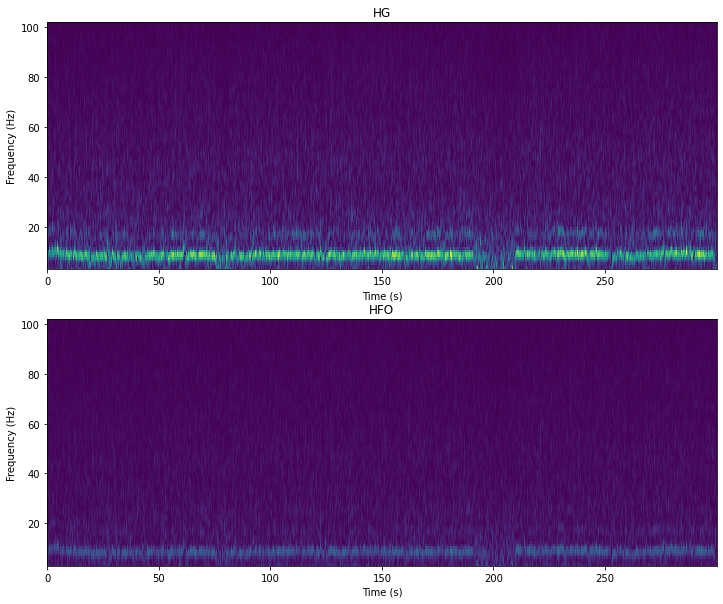

In [9]:
freqvector = np.arange(1,101,1)
TFD_HG = np.empty((len(freqvector),len(t)))
TFD_HFO = np.empty((len(freqvector),len(t)))

for i,f in enumerate(freqvector):
    # Filtering the signal
    lowcut = f/nyq # normalized low cut frequency
    highcut = (f+4)/nyq # nornmalized high cut frequency
    # Butterworth transfer function
    b,a = butter(order,[lowcut,highcut],'bandpass', False)
    # Filtered signal
    filteredHG = filtfilt(b,a,LFP_HG)
    filteredHFO = filtfilt(b,a,LFP_HFO)
    # Amplitude envelope
    TFD_HG[i] = np.abs(hilbert(filteredHG))
    TFD_HFO[i] = np.abs(hilbert(filteredHFO))


plt.figure(figsize=(12,10))

plt.subplot(211)
plt.pcolormesh(t,freqvector+2,TFD_HG)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.clim(0,0.5);
plt.title('HG')

plt.subplot(212)
plt.pcolormesh(t,freqvector+2,TFD_HFO)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.clim(0,0.5);
plt.title('HFO')

Question 8

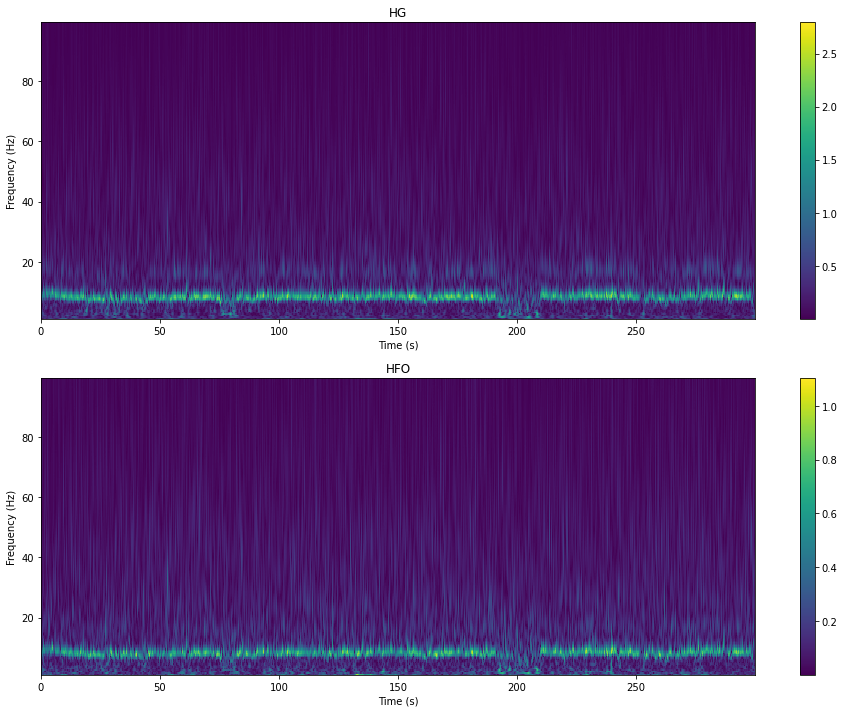

In [3]:
### TFD via Wavelet
freq = np.arange(1,100,0.5)
Fc = 1
NCycles = 7
sd = NCycles/(2*pi*Fc)
Fb = 2*sd**2
motherwavelet = 'cmor' + str(Fb) + '-' + str(Fc)
scale = pywt.central_frequency(motherwavelet)/(freq*dt)

# Wavelet Transform
WaveletTransformHG,freqs = pywt.cwt(LFP_HG,scale,motherwavelet,dt)
WaveletTransformHFO,freqs = pywt.cwt(LFP_HFO,scale,motherwavelet,dt)
TFD_HG = abs(WaveletTransformHG)
TFD_HFO = abs(WaveletTransformHFO)

plt.figure(figsize=(16,12))
plt.subplot(211)
plt.pcolormesh(t,freqs,TFD_HG)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('HG')
plt.colorbar()

plt.subplot(212)
plt.pcolormesh(t,freqs,TFD_HFO)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('HFO')
plt.colorbar()